### Important Notes
Important link related to [EDA](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)<br>

Information related to RSRP, RSSI etc. can be found [here](https://www.signalbooster.com/blogs/news/acronyms-rsrp-rssi-rsrq-sinr#:~:text=There're%20many%20acronyms%20related,to%20Interference%20plus%20Noise%20Ratio.)

In [1]:
import numpy as np
import pandas as pd
 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from keras.models import Sequential
from keras.layers import Dense
from sci_analysis import analyze
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

import seaborn as sns

In [2]:
df = pd.read_csv('data/data_ready_ML.csv', index_col = None)

<AxesSubplot:>

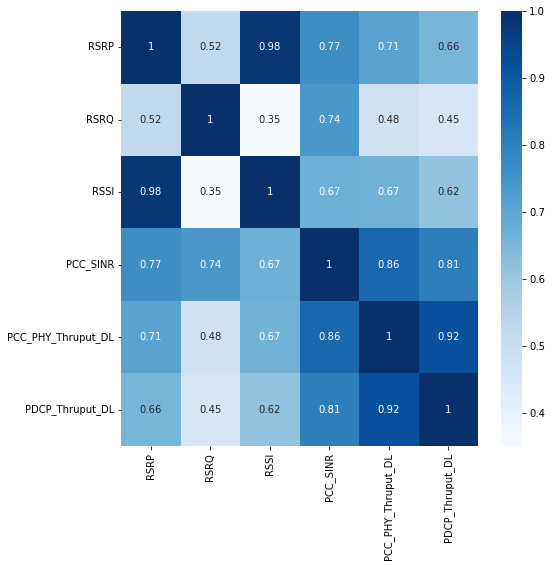

In [3]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

### Feature Scaling

In [4]:
scaler = MinMaxScaler()

df[['RSRP', 'RSRQ', 'RSSI', 'PCC_SINR', 
   'PCC_PHY_Thruput_DL', 'PDCP_Thruput_DL']] = scaler.fit_transform(
    df[['RSRP', 'RSRQ', 'RSSI', 'PCC_SINR', 'PCC_PHY_Thruput_DL',
       'PDCP_Thruput_DL']]) 


### Implementing XGBoost

In [5]:
# X = df2[['Day_int', 'Time', 'GridID']].values
X = df[['RSRP', 'RSRQ', 'RSSI', 'PCC_SINR']].values
y = df['PCC_PHY_Thruput_DL'].values

# Splitting dataset: Train, Test, Valid

#Data split
train_size = int(np.floor(len(df)*.9))
# val_size = int((len(df) - train_size)/2)
test_size = int((len(df) - train_size))

## Split data

x_train = X[:train_size]
y_train = y[:train_size]

x_test = X[train_size:]
y_test = y[train_size:]

# x_test = X[train_size+val_size:]
# y_test = y[train_size+val_size:]

print('train size: {}'.format(x_train.shape))
print('test size: {}'.format(x_test.shape))

train size: (1143, 4)
test size: (127, 4)


In [18]:
# create an xgboost regression model
model = XGBRegressor()

# create an xgboost regression model
model = XGBRegressor(n_estimators=2000, max_depth=7, 
                     eta=0.05, subsample=0.7, colsample_bytree=0.8)

# # define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

model.fit(x_train, y_train)

# make a prediction
y_pred = model.predict(x_test) 

Mean MAE: 0.045 (0.004)


In [10]:
y_test = y_test.reshape(-1,1)
y_test.shape

(127, 1)

In [13]:
y_pred = y_pred.reshape(-1,1)
y_pred.shape

(127, 1)

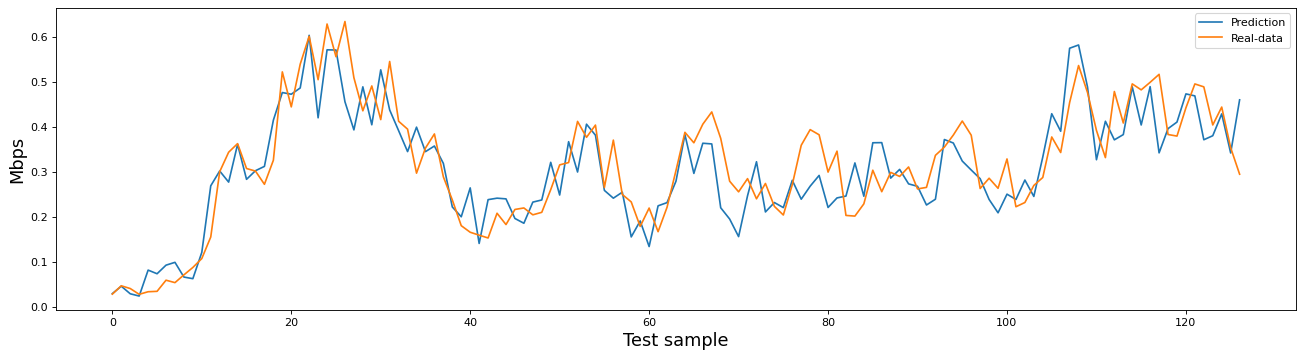

In [19]:
# y_test = scaler.inverse_transform(y_test)
# y_pred = scaler.inverse_transform(y_pred)

figure(figsize=(20, 5), dpi=80)
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real-data')
# plt.ylim(0,1)
# plt.xlim(0,400)
plt.legend()
plt.xlabel('Test sample', fontsize=16)
plt.ylabel('Mbps', fontsize=16)
plt.show()

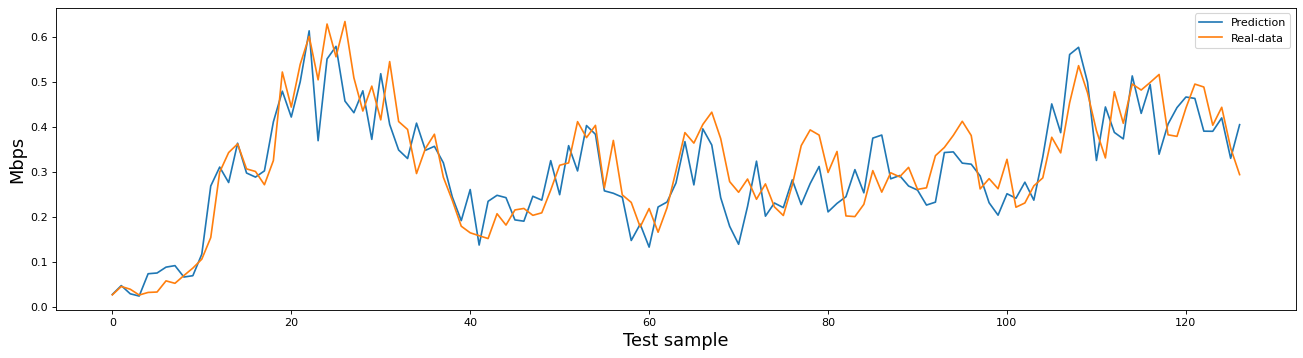

In [17]:
# y_test = scaler.inverse_transform(y_test)
# y_pred = scaler.inverse_transform(y_pred)

figure(figsize=(20, 5), dpi=80)
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real-data')
# plt.ylim(0,1)
# plt.xlim(0,400)
plt.legend()
plt.xlabel('Test sample', fontsize=16)
plt.ylabel('Mbps', fontsize=16)
plt.show()

In [ ]:
sns.boxplot(x='PCC_PHY_Thruput_DL',y='PCC_SINR',data=df)